# Simple Linear Regression

Let's use the very, very small 'buildings' dataset to see several different ways to conduct simple linear regression in Python. We'll also do some plotting.

----

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data into a DataFrame from the .csv file and look at its shape
buildings = pd.read_csv('./data/buildings.csv')
buildings.shape

(7, 3)

In [3]:
# Small data set so print the whole thing out
buildings

,Year,Stories,Height
0,1990,54,770
1,1990,28,428
2,1990,56,650
3,1990,62,722
4,1991,52,695
5,1991,30,450
6,1992,42,579


## Correlation

Recall that correlation measures the strength and direction of the **linear** relationship between two variables. Also, remember that the correlation coefficient will the be same regardless of the order of the two variables. You, the human, must determine which variable is the output (the `y`) and which is the input/independent variable (the `x`).

In [4]:
# Find the correlation between just the two variables of interest
buildings['Stories'].corr(buildings['Height'])

0.9385626189376988

In [5]:
# Find the correlation in the other direction to verify it will be the same
buildings.Height.corr(buildings.Stories)

0.9385626189376988

In [6]:
# Find the entire correlation matrix
buildings.corr()

,Year,Stories,Height
Year,1.000000,-0.306323,-0.239550
Stories,-0.306323,1.000000,0.938563
Height,-0.239550,0.938563,1.000000


In [7]:
buildings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     7 non-null      int64
 1   Stories  7 non-null      int64
 2   Height   7 non-null      int64
dtypes: int64(3)
memory usage: 296.0 bytes


### Heatmap

Even though the `Year` variable doesn't make a lot of sense of this dataset, we still went ahead and calculated the full correlation matrix. One of the nice and easy to use methods in the `seaborn` package is the `.heatmap()` method. You will often send a correlation matrix to it to see a nice picture of the correlations.

<Axes: >

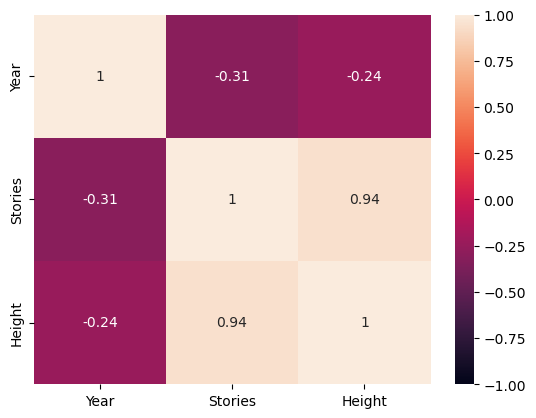

In [8]:
# Plot a heatmap of the correlation matrix
sns.heatmap(buildings.corr(), annot=True, vmin=-1, vmax=1)

### Plotting the Data

Continuing with using `seaborn`, let's create a scatter plot and add the fitted OLS regression line.

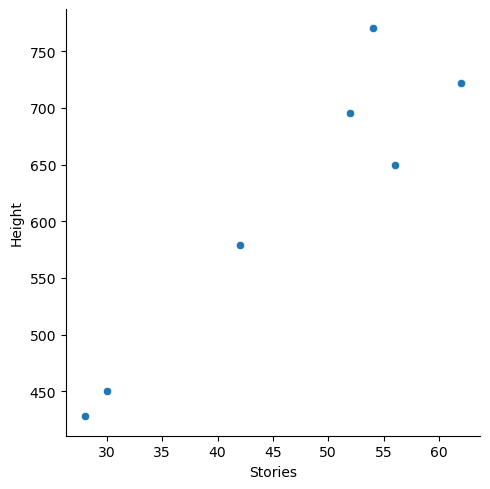

In [9]:
# Use relplot from seaborn to plot the data as a scatterplot
sns.relplot(x='Stories', y='Height', data=buildings)

<Axes: xlabel='Stories', ylabel='Height'>

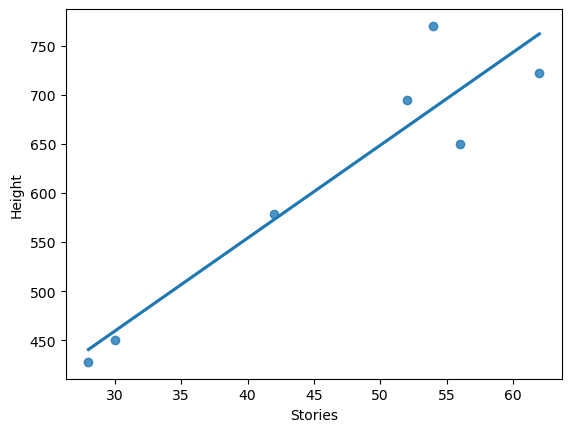

In [10]:
# Use regplot to add a regression line to scatter
sns.regplot(x='Stories', y='Height', data=buildings, ci=None)

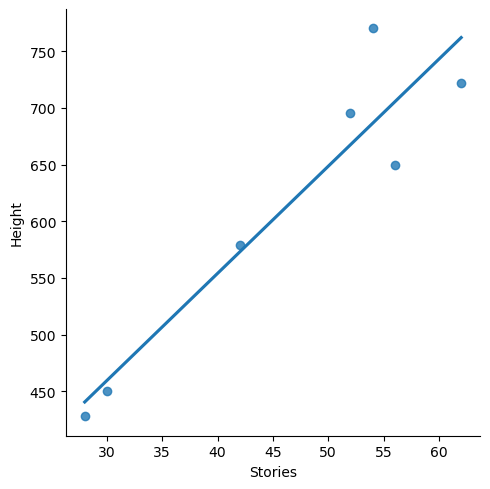

In [11]:
# Use lmplot to add a regression line to scatter 
sns.lmplot(x='Stories', y='Height', data=buildings, ci=None)

#### Using a `jointplot`

Within `seaborn` we have a function called `jointplot()` that can create a scatter plot, add the regression line, and add histograms for the two variables. This functionality can be superuseful when we have a lot of data. Here, we only have seven data points, so it will not add much value. However, let's go ahead and create one to see it in action.

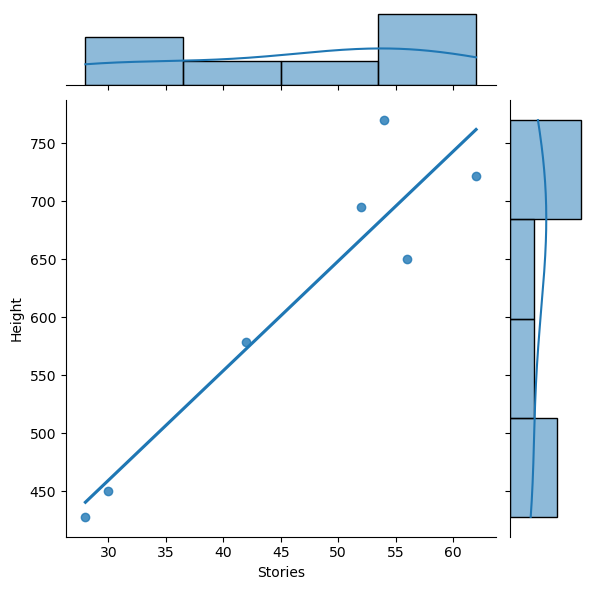

In [12]:
sns.jointplot(x='Stories', y='Height', data=buildings, kind='reg', ci=None)

### Where is the Regression Equation?
Unfortunately, we cannot get the regression equation from `regplot` nor `lmplot`. (Remember, `seaborn` is a visualization package, not a statistical one.) We could use `numpy` to get it. Another option is to use the `statsmodels` package. Let's try that instead.

----

## Using the `statsmodel` api
That was a lot of work; there has got to be a better way. There are multiple better ways and we will look at one now. We can use the [statsmodels library](https://www.statsmodels.org/stable/index.html).

In [13]:
# If we were importing the entire api we would use the following
#import statsmodels.formula.api as smf

# Because we know we are only going to OLS, let's just import it
from statsmodels.formula.api import ols

In [14]:
# Fit an OLS model and store it in a variable called results
# Use the statsmodels library to fit an OLS model
# Store the fit in a variable called 'results'
results = ols('Height ~ Stories', data=buildings).fit()

In [15]:
# What is results?
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [16]:
# Call .summary() on the results variable
results.summary()

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     36.98
Date:                Tue, 19 Sep 2023   Prob (F-statistic):            0.00174
Time:                        18:20:51   Log-Likelihood:                -36.193
No. Observations:                   7   AIC:                             76.39
Df Residuals:                       5   BIC:                             76.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    176.0663     74.398      2.367      0.064     -15.181     367.314
Stories        9.4492      1.554      6.081      0.002       5.455      13.443
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.379
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.585
Skew:                           0.689   Prob(JB):                        0.746
Kurtosis:                       2.671   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Let's just look at the coefficients table
results.summary().tables[1]

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,176.0663,74.398,2.367,0.064,-15.181,367.314
Stories,9.4492,1.554,6.081,0.002,5.455,13.443


In [18]:
# You can get the intercept and slope using .params
results.params

Intercept    176.066304
Stories        9.449185
dtype: float64

In [19]:
# What is results.params?
type(results.params)

pandas.core.series.Series

In [20]:
# Lots of other attributes on the results object
# Fitted values (that's the estimated y-hat values)
results.fittedvalues

0    686.322283
1    440.643478
2    705.220652
3    761.915761
4    667.423913
5    459.541848
6    572.932065
dtype: float64

In [31]:
buildings

,Year,Stories,Height
0,1990,54,770
1,1990,28,428
2,1990,56,650
3,1990,62,722
4,1991,52,695
5,1991,30,450
6,1992,42,579


In [21]:
# We can get the sum squares due to regression (explained sum of squares)
# and the sum of squared residuals (errors)
print(f'Explained Sum of Squares: {results.ess}')
print(f'Sum of Squared Residuals: {results.ssr}')

Explained Sum of Squares: 93879.00069875778
Sum of Squared Residuals: 12692.713586956512


In [22]:
# We can get the MSE for regression, MSE for residuals
print(f'MSE for Regression: {results.mse_model}')
print(f'MSE for Residuals:  {results.mse_resid}')

MSE for Regression: 93879.00069875778
MSE for Residuals:  2538.542717391302


In [23]:
# R-squared is easy too
print(f'R-squared: {results.rsquared:0.2%}')

R-squared: 88.09%


#### Plotting the Residuals / Errors
We often want to plot the residuals / errors to help us determine the appropriateness of the linear model. It is easy to get the residuals from our regression results. We'll print out the residuals and then plot them two different ways.

In [24]:
# We can also get and print the residuals (errors)
print(results.resid)

0    83.677717
1   -12.643478
2   -55.220652
3   -39.915761
4    27.576087
5    -9.541848
6     6.067935
dtype: float64


In [32]:
results.resid.sum()

1.1368683772161603e-12

<Axes: xlabel='Stories'>

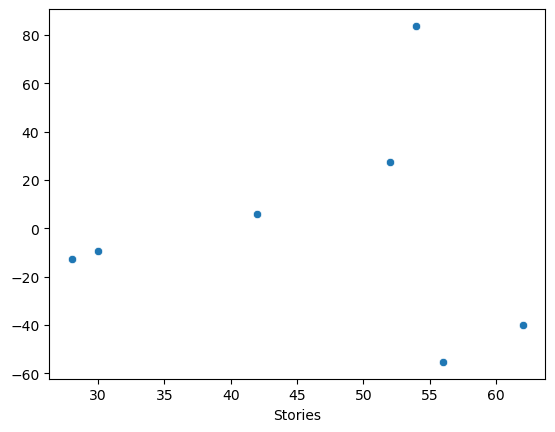

In [25]:
# Plot the residuals using a scatter plot
sns.scatterplot(x='Stories', y=results.resid, data=buildings)

<Axes: xlabel='Stories', ylabel='Height'>

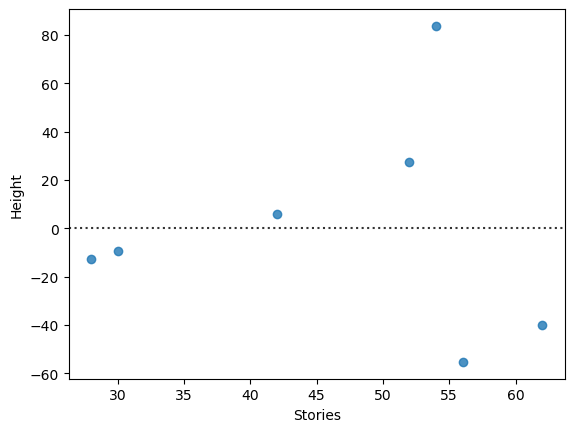

In [26]:
# seaborn has a convenience function called residplot()
sns.residplot(x='Stories', y='Height', data=buildings)

### Comparing "Mean Model" to Simple Linear Regression
One idea is that we could simply use a "naive" model for forecasting. An example of this approach would be to simply use the average `Height` across all buildings (observations) as our prediction. We should immediately think that this naive model will not be as good as our simple linear regression model based on, among other things, the R-squared value we saw earlier.

Let's first plot both the "mean model" and the simple linear regression model. Then we can compare their errors.

Text(0.5, 1.0, 'Simple Linear Regression Model')

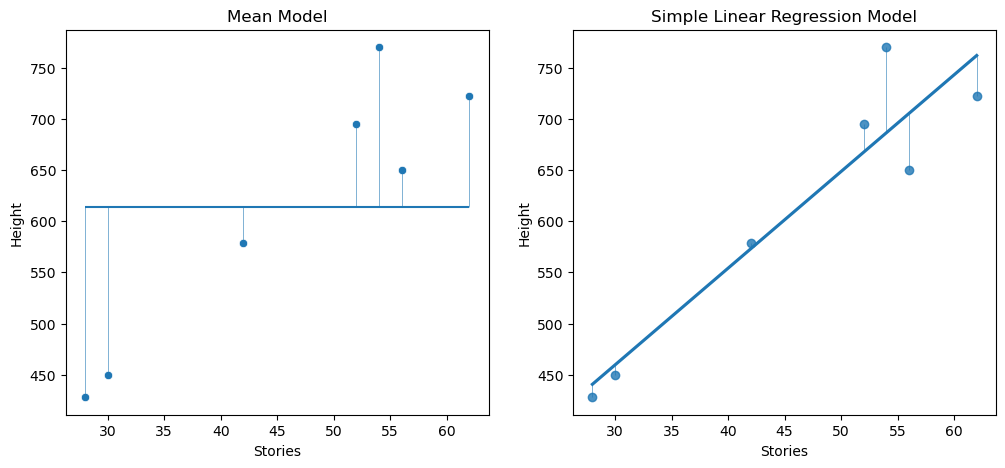

In [27]:
# Let's plot both the "mean model" and the SLR
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Mean model in first subplot
sns.scatterplot(x='Stories', y='Height', data=buildings, ax=ax[0])

# Add the mean line
ax[0].hlines(buildings.Height.mean(), buildings.Stories.min(), buildings.Stories.max())

# Add vertical lines from actual to the mean line (prediction)
ax[0].vlines(buildings.Stories, buildings.Height.mean(), buildings.Height,
             lw=0.4)

# Add title
ax[0].set_title('Mean Model')

# Now plot the SLR
sns.regplot(x='Stories', y='Height', data=buildings, ci=None, ax=ax[1])

# Add vertical lines from actual to the regression line (prediction)
ax[1].vlines(buildings.Stories, results.fittedvalues, buildings.Height,
             lw=0.4)

# Add title
ax[1].set_title('Simple Linear Regression Model')

In [35]:
# We see that when using the "naive" mean model, the errors appear to 
# greater than when using the simple linear regression model. 
# One way to visualize how much better the SLR is compared to the mean model
# is to plot the histogram of the absolute errors.
#
# We have already seen the SLR errors 
abs_slr_errors = abs(results.resid)
print('SLR Errors:')
print(abs_slr_errors)

# Get the mean model's errors
mean_errors = abs(buildings.Height - buildings.Height.mean())
print('\nNaive Mean Errors:')
print(mean_errors)

SLR Errors:
0    83.677717
1    12.643478
2    55.220652
3    39.915761
4    27.576087
5     9.541848
6     6.067935
dtype: float64

Naive Mean Errors:
0    156.571429
1    185.428571
2     36.571429
3    108.571429
4     81.571429
5    163.428571
6     34.428571
Name: Height, dtype: float64


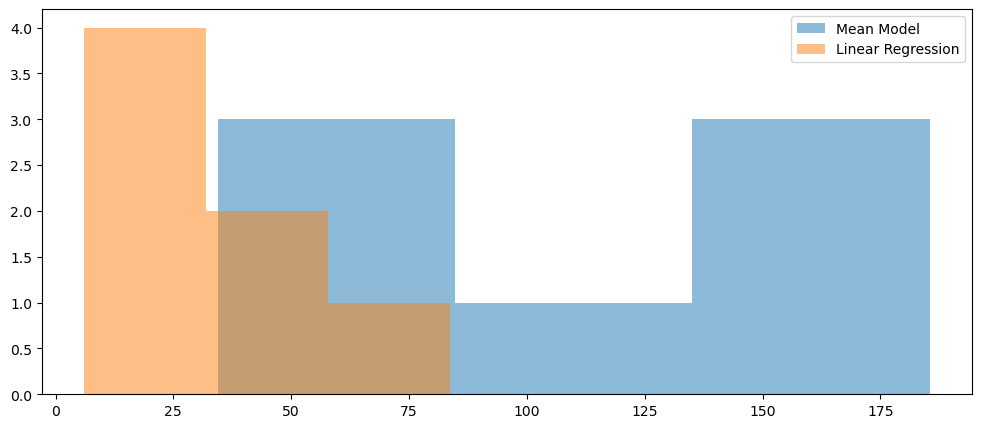

In [37]:
# Now plot them as histograms on top of each other
# Note, because the datset is so small, this may not be very pretty
plt.figure(figsize=(12,5))
plt.hist(mean_errors, alpha=0.5, label='Mean Model', bins=3)
plt.hist(abs_slr_errors, alpha=0.5, label='Linear Regression', bins=3)
plt.legend()

In [39]:
# How often is the linear regression model better?
(abs_slr_errors < mean_errors).mean()

0.8571428571428571

In [40]:
6/7

0.8571428571428571

# Residual Plots

<Axes: xlabel='Height'>

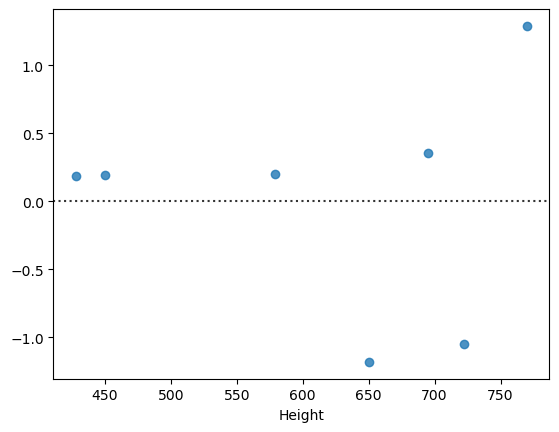

In [41]:
sns.residplot(x='Height', y=results.resid_pearson, data=buildings)

Text(0, 0.5, 'Standardized Residuals')

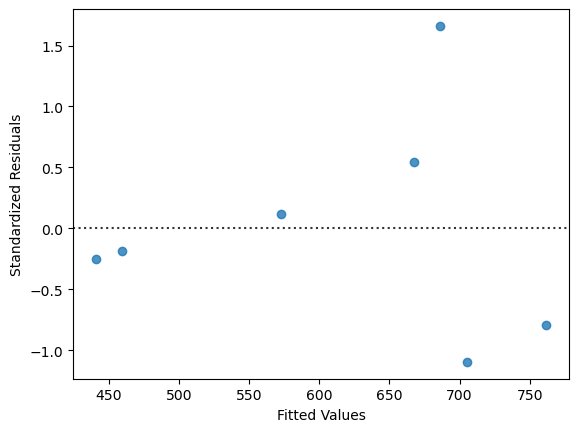

In [42]:
# plot standardized residuals on y-axis
# and the prediction on the x-axis
another_plot = sns.residplot(x=results.fittedvalues, y=results.resid_pearson)
another_plot.set_xlabel('Fitted Values')
another_plot.set_ylabel('Standardized Residuals')

In [43]:
buildings

,Year,Stories,Height
0,1990,54,770
1,1990,28,428
2,1990,56,650
3,1990,62,722
4,1991,52,695
5,1991,30,450
6,1992,42,579


**&copy; 2021 - Present: Matthew D. Dean, Ph.D.   
Clinical Associate Professor of Business Analytics at William \& Mary.**